## Test Bayes

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy import optimize
from scipy import stats
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use("ggplot")

## Problem 1-1

There are two bags of balls each of which contains red balls and blue balls.

Your child selects one bag, picks one ball from the bag, and put it back to the bag . 
He/she shows you that he/she got a blue ball, but does not tell which bag he/she chosen. 

Can you guess which bag he/she picked given the outcome?


Here, lets assume the following. <br>
bag A:3 red balls and 7 blue balls <br>
bag B:6 red balls and 6 blue balls <br>
(Usually, you don't have this detailed information. You need to make a statistical model and estimate its parameters. e.g. follow X distribution with parameter Y.)

Also, you know he/she prefer bag A to bag B because bag A has a design of his/her favorite character. <br>
You guess he/she picked bag A with a prob. of 0.7 (and bag B with a prob. of 0.3). 

([<matplotlib.axis.XTick at 0x7f16b3b47370>,
 [Text(0, 0, 'a'), Text(1, 0, 'b')])

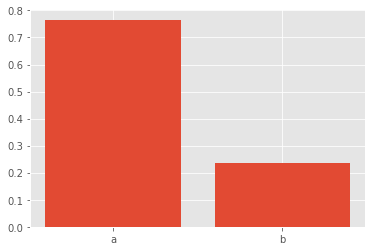

In [3]:
p_a = 3 / 10 # p(y=red|x=A)
p_b = 6 / 12 # p(y=red|x=B)
p_prior = 0.7

# 0:blue, 1:red
pick_ball = [0]

# likelihood 
# the probability of getting the result given x = A
likelihood_a = bernoulli.pmf(pick_ball, p_a)
# the probability of getting the result given x = B
likelihood_b = bernoulli.pmf(pick_ball, p_b)

pa_posterior = likelihood_a * p_prior # p(y=red|x=A) x p(x=A)
pb_posterior = likelihood_b * (1 - p_prior) # p(y=red|x=B) x p(x=B)

norm = pa_posterior + pb_posterior 


df = pd.DataFrame([pa_posterior/norm, pb_posterior/norm], columns=["post"])
x = np.arange(df.shape[0])
plt.bar(x, df["post"])
plt.xticks(x, ["a", "b"])


### problem 1-2

Now, he/she picks another ball from the same bag and put it back to the bag. <br>
This time, it was a red ball. <br>
Which bag do you think he/she selected more likely? 

([<matplotlib.axis.XTick at 0x7f16b32c3a00>,
 [Text(0, 0, 'a'), Text(1, 0, 'b')])

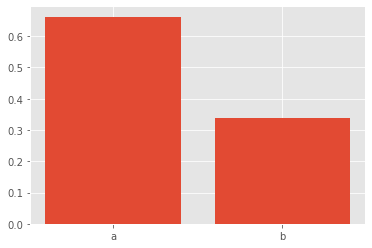

In [4]:
pick_balls = [0, 1]

# p(y1=red,y2=blue|x=A) x p(x=A) = p(y1=red|x=A) x p(y2=blue|x=A) 
# p(y1=red,y2=blue|x=A) x p(x=B) = p(y1=red|x=B) x p(y2=blue|x=B) 
# we can compute likelihood in this way because each ball-pick is independent.
likelihood_a = np.prod(bernoulli.pmf(pick_balls, p_a)) 
likelihood_b = np.prod(bernoulli.pmf(pick_balls, p_b))

pa_posterior = likelihood_a * p_prior
pb_posterior = likelihood_b * (1 - p_prior)

norm = pa_posterior + pb_posterior 

df = pd.DataFrame([pa_posterior/norm, pb_posterior/norm], columns=["post"])
x = np.arange(df.shape[0])
plt.bar(x, df["post"])
plt.xticks(x, ["a", "b"])

### problem 1-3

Now, he/she picks + 4 ball and returns them back to the bag. <br>
They were red, red, and red. <br>
Which bag do you think he/she selected more likely?

([<matplotlib.axis.XTick at 0x7f16b3226c40>,
 [Text(0, 0, 'a'), Text(1, 0, 'b')])

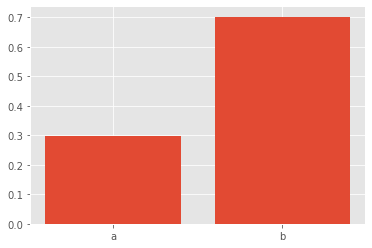

In [5]:
pick_balls = [0, 1, 1, 1, 1]
likelihood_a = np.prod(bernoulli.pmf(pick_balls, p_a))
likelihood_b = np.prod(bernoulli.pmf(pick_balls, p_b))

pa_posterior = likelihood_a * p_prior
pb_posterior = likelihood_b * (1 - p_prior)

norm = pa_posterior + pb_posterior 

df = pd.DataFrame([pa_posterior/norm, pb_posterior/norm], columns=["post"])
x = np.arange(df.shape[0])
plt.bar(x, df["post"])
plt.xticks(x, ["a", "b"])

## Problem 2

In the problem 1, we assume that we know how many red/blue balls each bag contain. <br>
However, generally speaking, this kind of detailed information is unknown. <br>
In such case, you need to make a statistical model and estimate its parameters. <br>

We will learn what this means in the following example.

Say, we measured hieght from 80 people. <br>
Unlike the previous example, we don't know the underlying distribution. <br>
i.e. what kind of probability distribution generates the observations. 

To make a guess, what you can do is visualisation. 

### Step 1. Visualise the data.

In [6]:
df = pd.read_excel("./data/MAP_data.xlsx", index_col="id")
df.head()

,height
id,
1,173.10
2,159.51
3,175.83
4,163.60
5,167.20


Text(0, 0.5, 'frequency')

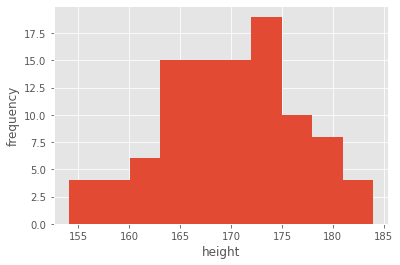

In [7]:
plt.hist(df["height"])
plt.xlabel("height")
plt.ylabel("frequency")

### Step 2. Make your statistical model and estimate the parameters.

Based on the visual inspection, we assume that it is a normal distribition. <br>
So, your statistical model is a simple normal distribition. <br>
Here, you need two parameters, mean and variance, to define the distribution. <br>

Of course, we do not know what they are. Then, we need to estimate them. <br>
In this example, we try to find the parameters that are most likely to happen given the observations. 

f(parameters | observation) 


In [8]:
def likelihood(mu, *args):
    li = -np.log10(stats.norm.pdf(mu, loc=args))
    return(np.sum(li))

In [9]:
optimize.minimize(likelihood, 170, args=df["height"])

      fun: 941.1571402569105
 hess_inv: array([[1]])
      jac: array([-7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([169.78480008])